In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import urllib
import math

In [ ]:
fin = open("../data/top100zips.txt")
zip100 = []
for line in fin:
    zip100.append(line.strip().split("\t")[0])
zip100

In [33]:
zdict = {}
for z in zip100:
    z = str(z).zfill(5)
    try:
        r = urllib.request.urlopen("http://ziplocate.us/api/v1/" + z)
        data = r.read().decode("utf-8")
        r.close()
        decoded = json.loads(data)
        lat = float(decoded['lat'])
        lng = float(decoded['lng'])
        zdict[z] = (lng, lat)
    except:
        pass 

In [ ]:
zdict

(40.1717302397716, 43.0028842797553)

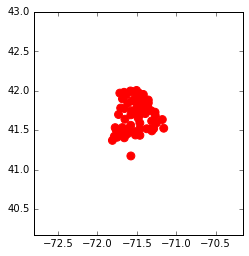

In [6]:
bounds_min = [200, 200]
bounds_max = [-200, -200]

fig, ax = plt.subplots()

for k in zdict:
    if zdict[k][1] < bounds_min[1]:
        bounds_min[1] = zdict[k][1]
    if zdict[k][1] > bounds_max[1]:
        bounds_max[1] = zdict[k][1]        
    if zdict[k][0] < bounds_min[0]:
        bounds_min[0] = zdict[k][0]
    if zdict[k][0] > bounds_max[0]:
        bounds_max[0] = zdict[k][0]
    c = plt.Circle((zdict[k][0], zdict[k][1]), 0.05, color="r")
    ax.add_artist(c)

ax.set_aspect(1)
ax.set_xlim(bounds_min[0]-1, bounds_max[0]+1)
ax.set_ylim(bounds_min[1]-1, bounds_max[1]+1)

In [54]:
def create_paths(region):
    fin = open("../data/purple/" + region + ".txt")
    lower = [float(low) for low in fin.readline().split()]
    upper = [float(up) for up in fin.readline().split()]
    c = int(fin.readline())
    fin.readline()

    paths = {}

    for i in range(c):
        subregion = fin.readline().strip()
        region = fin.readline().strip()
        vc = int(fin.readline())

        verts = []
        codes = [Path.MOVETO]
        for j in range(vc):
            codes.append(Path.LINETO)
            v = [float(x) for x in fin.readline().split()]
            verts.append((v[0], v[1]))
        verts.append(verts[0])
        codes[-1] = Path.CLOSEPOLY
        path = Path(verts, codes)
        paths[subregion + str(i)] = path

        fin.readline()
    fin.close()
    
    return lower, upper, paths

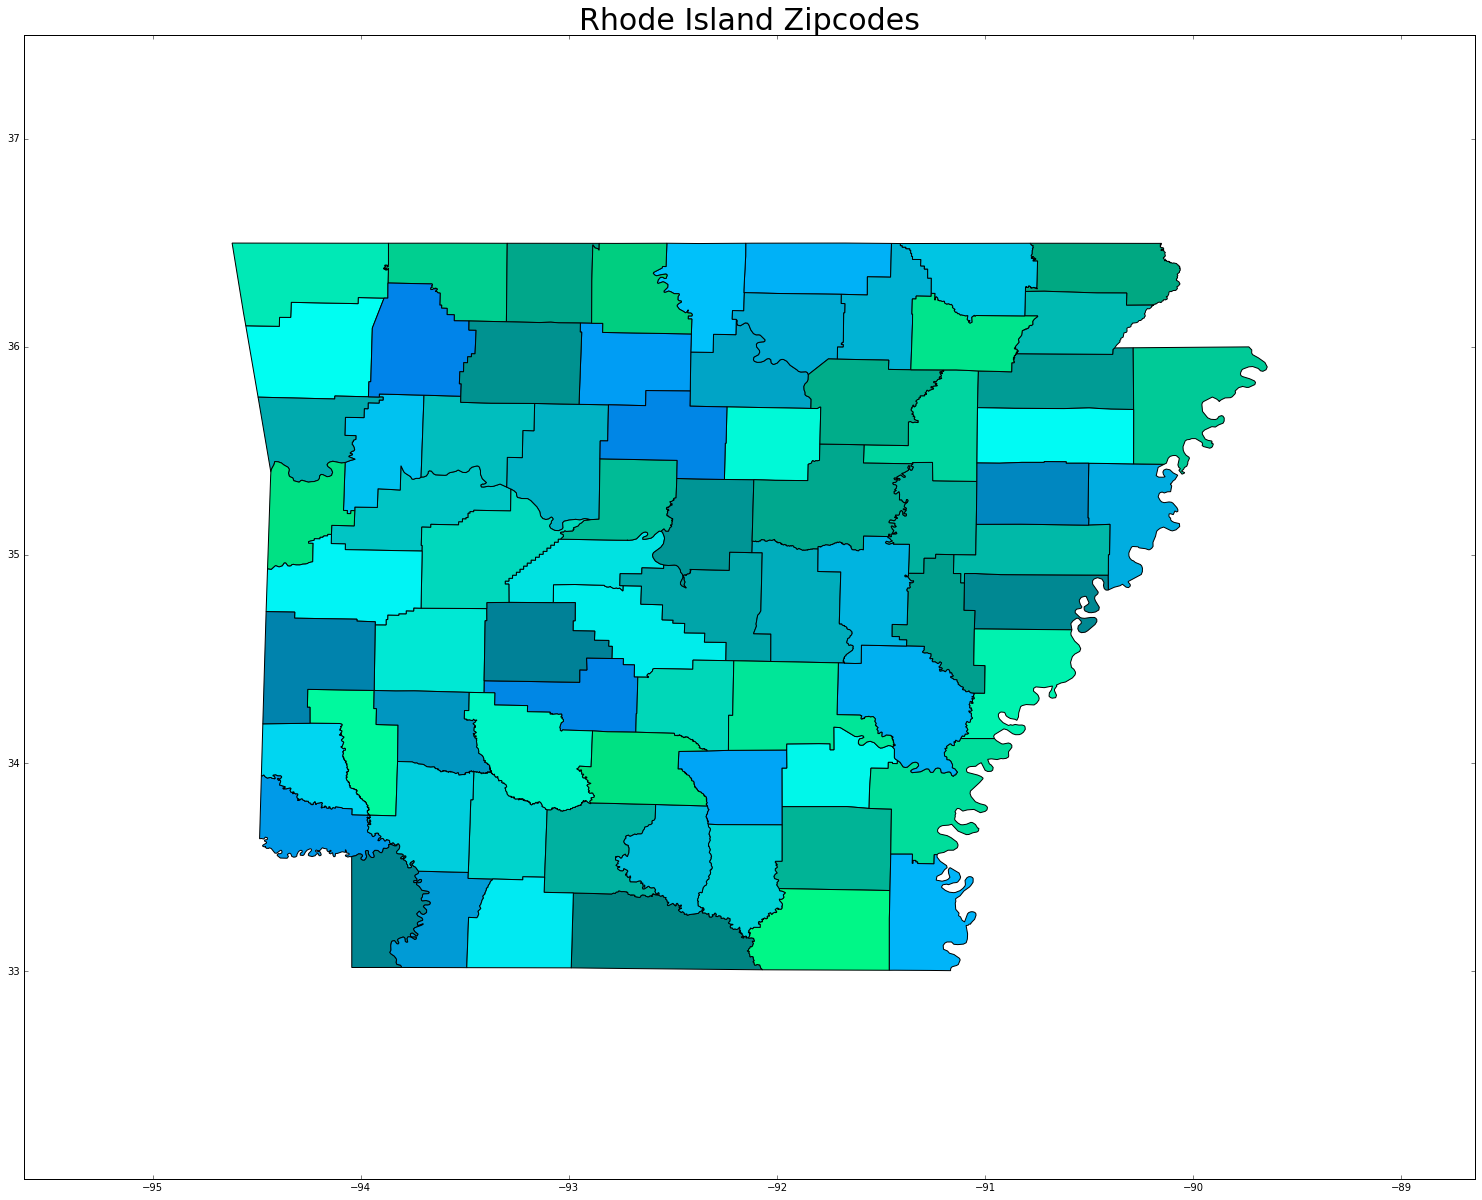

In [55]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import random

fig, ax = plt.subplots()

lower, upper, paths = create_paths("AR")

for k in zdict:
    cir = plt.Circle((zdict[k][0], zdict[k][1]), 0.5, color="r", alpha=0.5)
    ax.add_artist(cir)

for region in paths:
    col = (0, 0.5 + 0.5 *random.random(), 0.5 + 0.5 *random.random())

    patch = patches.PathPatch(paths[region], edgecolor="k", facecolor=col, lw=1)
    ax.add_patch(patch)


fig.set_size_inches(28.5,20.5)
ax.set_xlim(lower[0]-1, upper[0]+1)
ax.set_ylim(lower[1]-1, upper[1]+1)
#plt.axis('off')
ax.set_title("Rhode Island Zipcodes", fontsize=30)
ax.set_aspect(1)

plt.savefig("map.png")

In [18]:
def winkeltripel(lon, lat):
    central =  math.radians(-98)
    phi_1 = math.acos(2 / math.pi)
    #phi_1 = 0
    alpha = math.acos(math.cos(lat) * math.cos((lon - central)/ 2))
    x = 0.5 * (lon * math.cos(phi_1) + 
               (2 * math.cos(lat) * math.sin((lon - central) / 2)) / 
               (math.sin(alpha) / alpha))
    y = 0.5 * (lat + math.sin(lat) / (math.sin(alpha) / alpha))
    return x, y

In [35]:
zdicwt = {}
for k in zdict:
    x, y = winkeltripel(math.radians(zdict[k][0]), 
                        math.radians(zdict[k][1]))

    zdicwt[k] = (math.degrees(x), math.degrees(y))


In [21]:
def create_paths(region, projection):
    fin = open("../data/purple/" + region + ".txt")
    lower = [float(low) for low in fin.readline().split()]
    upper = [float(up) for up in fin.readline().split()]
    c = int(fin.readline())
    fin.readline()

    paths = {}

    for i in range(c):
        subregion = fin.readline().strip()
        region = fin.readline().strip()
        vc = int(fin.readline())

        verts = []
        codes = [Path.MOVETO]
        for j in range(vc):
            codes.append(Path.LINETO)
            v = [float(x) for x in fin.readline().split()]
            x, y = projection(math.radians(v[0]), math.radians(v[1]))
            verts.append((math.degrees(x), math.degrees(y)))
        verts.append(verts[0])
        codes[-1] = Path.CLOSEPOLY
        path = Path(verts, codes)
        paths[subregion + str(i)] = path

        fin.readline()
    fin.close()
    
    return lower, upper, paths

Add in the top 100 populated zipcodes here

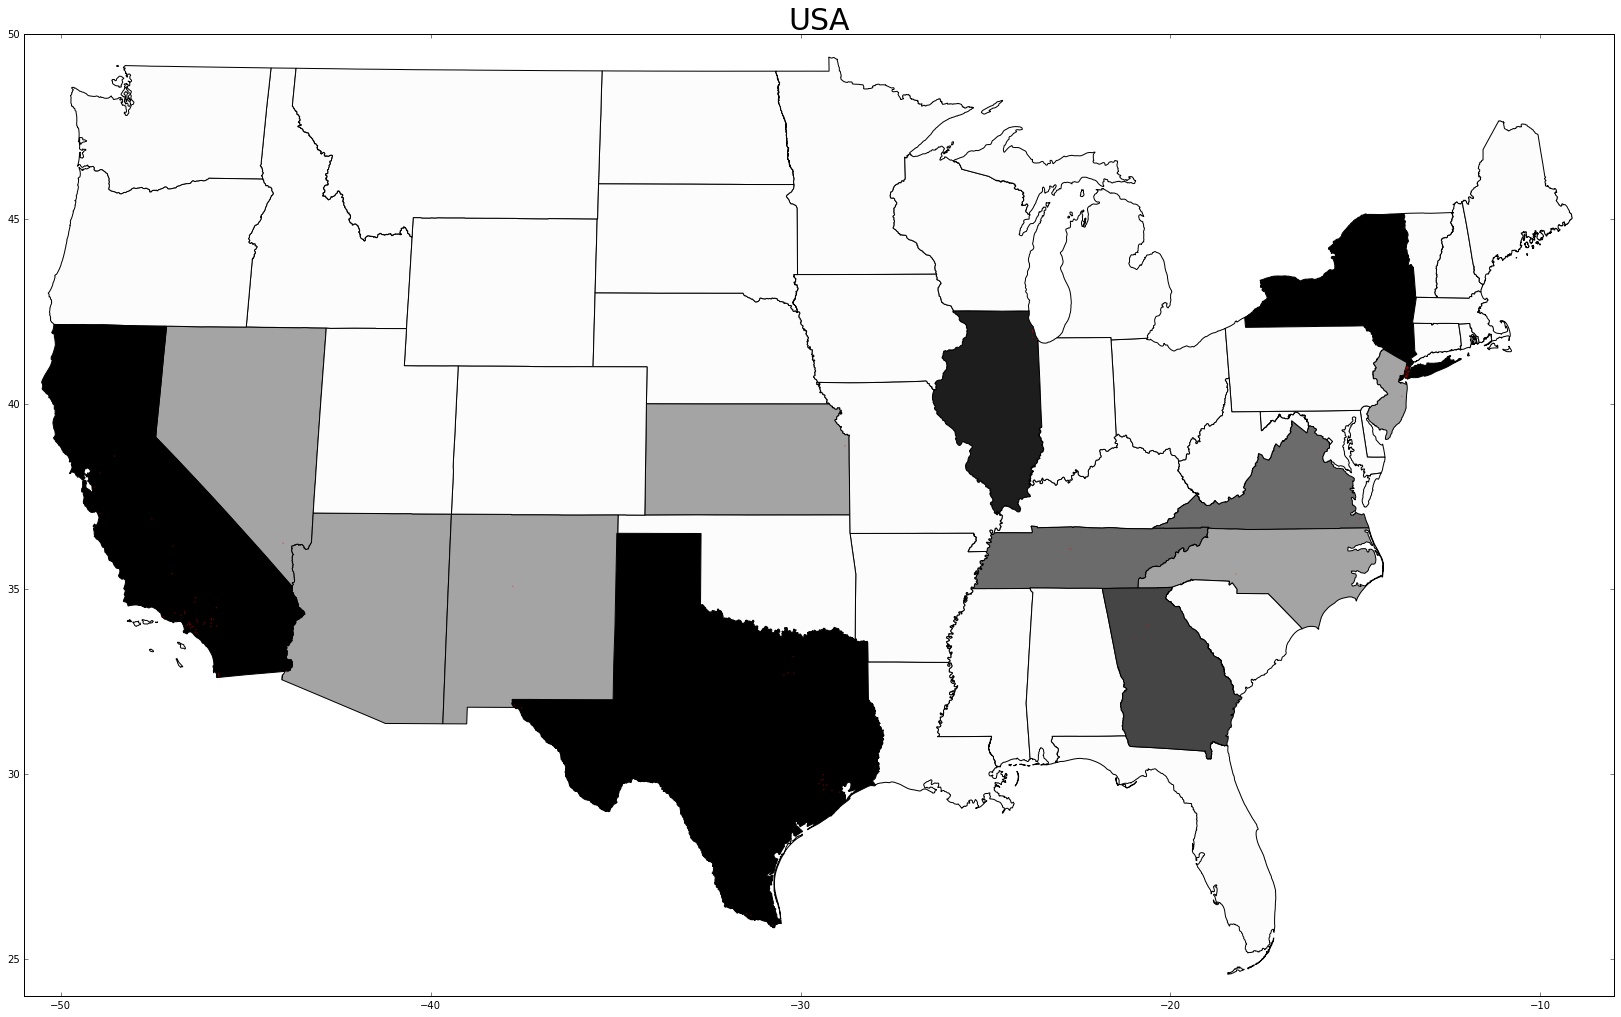

In [53]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import random

fig, ax = plt.subplots()

lower, upper, paths = create_paths("USA", winkeltripel)

for k in zdict:
    cir = plt.Circle((zdicwt[k][0], zdicwt[k][1]), 0.005, color="r", alpha=0.5)
    ax.add_artist(cir)

for region in paths:

    p = 0.99
    for k in zdict:
        if paths[region].contains_point(zdicwt[k]):
            p *= 0.65
    col = (p, p, p)

    patch = patches.PathPatch(paths[region], edgecolor="k", facecolor=col, lw=1)
    ax.add_patch(patch)


fig.set_size_inches(28.5,20.5)
ax.set_xlim(-51, -8)
ax.set_ylim(24, 50)
#plt.axis('off')
ax.set_title("USA", fontsize=30)
ax.set_aspect(1)

plt.savefig("map.png")

In [41]:
import json
locin = open("../data/LocationHistory.json")
dataloc = locin.read()
locin.close()

decodedloc = json.loads(dataloc)

In [42]:
xcor = []
ycor = []
xfl = []
yfl = []
mylocdic = {}
for p in decodedloc["locations"]:
    x, y = winkeltripel(math.radians(p['longitudeE7']*0.0000001), 
                        math.radians(p['latitudeE7']*0.0000001))

    mylocdic[p['timestampMs']] = (math.degrees(x), math.degrees(y))
    xcor.append(math.degrees(x))
    ycor.append(math.degrees(y))
    if len(xcor) > 1:
        distance = math.sqrt((xcor[-1] - xcor[-2]) ** 2 + (ycor[-1] - ycor[-2]) ** 2)
        if distance > 2:
            xfl.append((xcor[-2],xcor[-1]))
            yfl.append((ycor[-2],ycor[-1]))
          

In [52]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import random

fig, ax = plt.subplots()

lower, upper, paths = create_paths("USA", winkeltripel)

for k in zdict:
    cir = plt.Circle((zdicwt[k][0], zdicwt[k][1]), 0.005, color="r", alpha=0.5)
    ax.add_artist(cir)

for region in paths:

    p = 0.99
    col = (p, p, p)

    patch = patches.PathPatch(paths[region], edgecolor="k", facecolor=col, lw=1)
    ax.add_patch(patch)

plt.plot(xcor, ycor, color="r", linewidth=.80)
for xp, yp in zip(xfl, yfl):
    plt.plot(xp, yp, color="b", linewidth=2.0)

fig.set_size_inches(28.5,20.5)
ax.set_xlim(-51, -8)
ax.set_ylim(24, 50)
#plt.axis('off')
ax.set_title("Where has Dr. Goadrich travelled recently?", fontsize=30)
ax.set_aspect(1)

plt.savefig("map.png")